    # Automatic Jupyter Notebook for OpenML dataset 6: letter

,flow,score
0,sklearn.pipeline.Pipeline(imputation=openmlstu...,0.999796
1,sklearn.pipeline.Pipeline(imputation=openmlstu...,0.999790
2,sklearn.pipeline.Pipeline(imputation=openmlstu...,0.999789
3,sklearn.pipeline.Pipeline(imputation=openmlstu...,0.999785
4,sklearn.model_selection._search.RandomizedSear...,0.999785
5,sklearn.pipeline.Pipeline(imputation=openmlstu...,0.999784
6,sklearn.pipeline.Pipeline(imputation=openmlstu...,0.999778
7,sklearn.pipeline.Pipeline(imputation=openmlstu...,0.999777
8,sklearn.pipeline.Pipeline(imputation=openmlstu...,0.999777
9,sklearn.pipeline.Pipeline(imputation=openmlstu...,0.999774


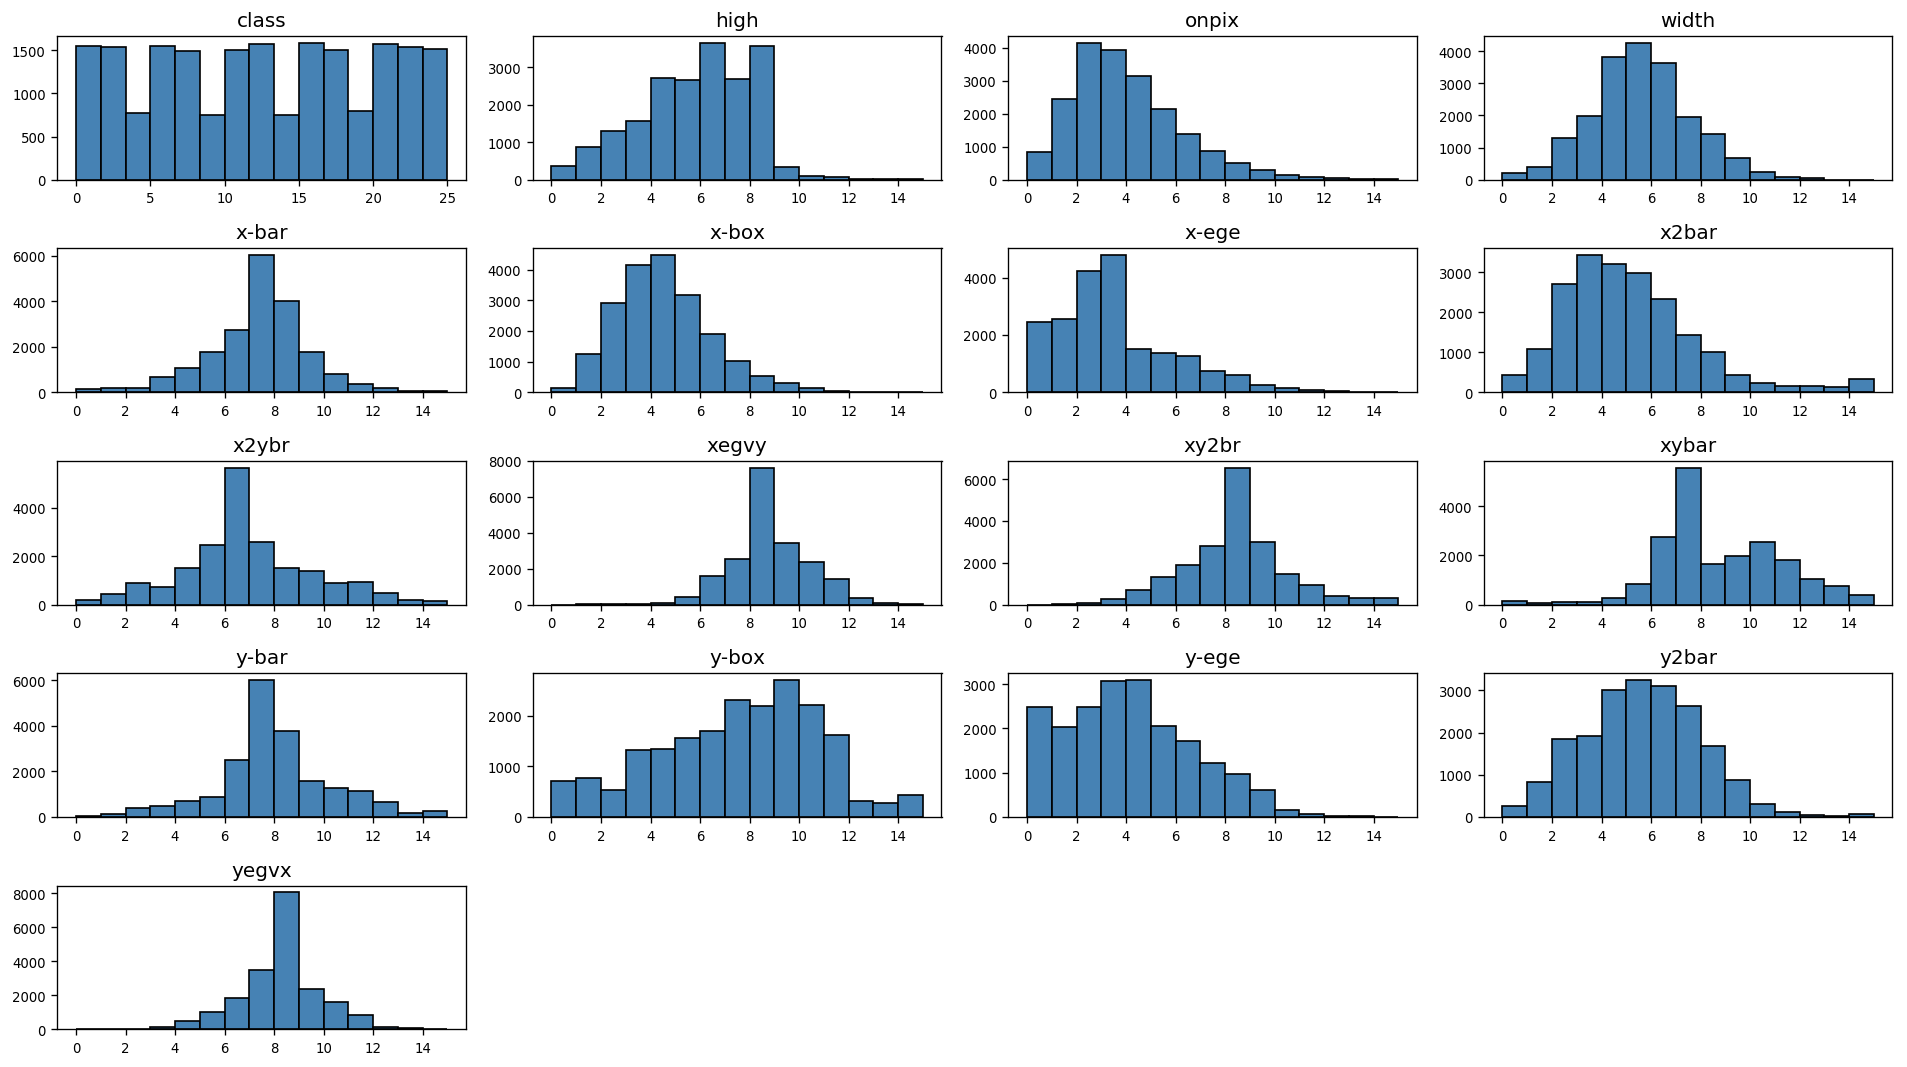

In [1]:
%matplotlib inline
from scripts.preamble import *
did = 6
data = oml.datasets.get_dataset(did)
show1DHist(data)
task, topList, strats = printTopNFlows(did, data.default_target_attribute, 10) 
topList 

In [2]:
from scripts.problemType import *
problemType = findProblemType(data) 
checkTask(task, problemType, data.default_target_attribute) 

Problem type: supervised classification problem.
Using correct task


In [3]:
from scripts.localDataOpenMLInterface import *
showTopNSimilarDatasets("datasetSimilarityMatrixNormalized", did, 10) 

     did               name  similarity                             url
0    531             boston       0.615    https://www.openml.org/d/531
1  41021          Moneyball       0.505  https://www.openml.org/d/41021
2    541             socmob       0.503    https://www.openml.org/d/541
3   1209         BNG(vowel)       0.480   https://www.openml.org/d/1209
4    665    sleuth_case2002       0.426    https://www.openml.org/d/665
5   4552  BachChoralHarmony       0.367   https://www.openml.org/d/4552
6   1044      eye_movements       0.366   https://www.openml.org/d/1044
7  40663        calendarDOW       0.358  https://www.openml.org/d/40663
8  40672               fars       0.352  https://www.openml.org/d/40672
9   4137           Dorothea       0.302   https://www.openml.org/d/4137


Complexity threshold to determine if an algorithm will be run.


In [4]:
comp = 50000000000000

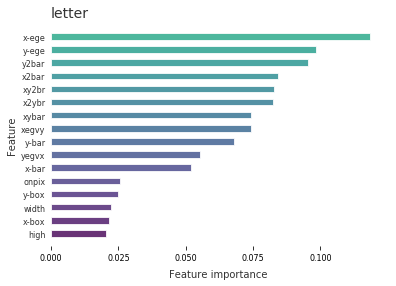

In [5]:
from scripts.featureImportance import *
featureImportance(data) 

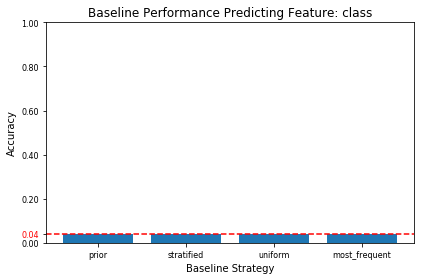

In [6]:
from scripts.baselines import *
maxBaseline = generateBaselines(data, problemType) 

c:\users\hugo\anaconda3\lib\site-packages\deap\tools\_hypervolume\pyhv.py:33: ImportWarning: Falling back to the python version of hypervolume module. Expect this to be very slow.
  "module. Expect this to be very slow.", ImportWarning)


Median execution time in ms: 1410.0
Mean execution time in ms: 1171244.8564494383


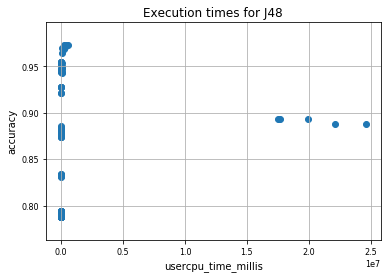

Median execution time in ms: 11220.0
Mean execution time in ms: 18327.141


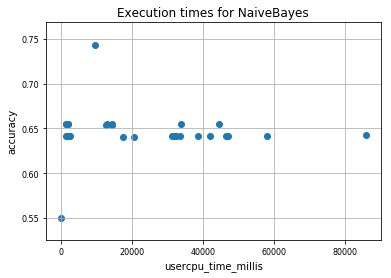

Run already exists in OpenML, WIP
Median execution time in ms: 13130.0
Mean execution time in ms: 14556.415094339623


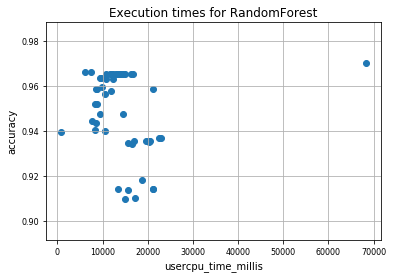

Median execution time in ms: 124160.0
Mean execution time in ms: 133140.0


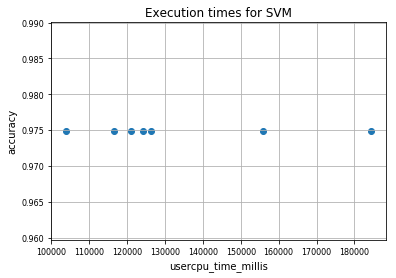

Median execution time in ms: 35715.0
Mean execution time in ms: 104527.43472222221


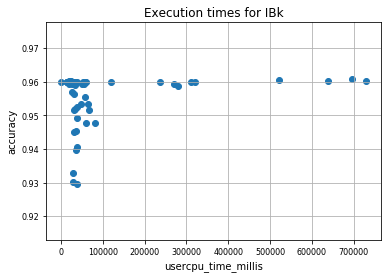

Run already exists in OpenML, WIP


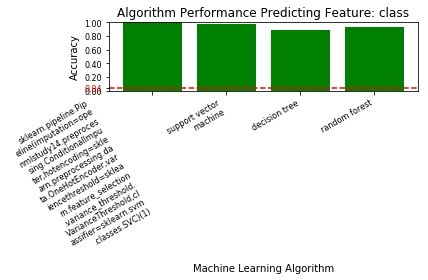

In [7]:
from scripts.machineLearningAlgorithms import *
strats = runMachineLearningAlgorithms(data, comp, strats, problemType, task, showRuntimePrediction=True, runTPOT=False)
plot_alg(data, strats, maxBaseline, problemType) 